# Introduction to Artificial Neural Networks with Keras

Artificial Neural Networks (ANNs): is a Machine Learning model inspired by the networks of biological neurons found in our brains.

#### Biological Neuron
![Biological Neuron](images/biological-neuron.jpg)


Biological neurons produce short electrical impulses called *action potentials* (APs, or just *signals*) which travel along the axons and make the synapses release chemical signals called *neurotransmitters*. When a neuron receives suffient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses.

These individual neurons are organized in a vast network of billions, with each neuron typically connected to thousands of other neurons.

### Logical computations with Neurons

The below diagram represents the logical computations on neuron activation.

![Logical Computations](images/log_comp.png)

* If A is activated, then C also gets activated
* C is activated only when both A and B are activated (logical *AND*)
* C is activated if either A or B is activated (logical *OR*)
* C is activated only if A is active and B is off.

### The Perceptron
The *Perceptron* is one of the simplest ANN architectures based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes *lienar threshold unit* (LTU). the inputs and outputs are numbers (instead of binary on/off values, and each input connection is associated with a weight.

The TLU computes the weighted sum of its inputs ($z = w_1x_1 + w_2x_2 +  ... + w_nx_n = x^Tw$), then applies a step function to that sum and outputs the result : $h_w(x)$ = step(z), where z = $x^Tw$.


![TLU](images/tlu.png)


The most common step function used in Perceptrons is the *Heaviside step function.* Sometimes the sign function is used instead.

 $$ heaviside(z)=   \left\{
\begin{array}{ll}
      0 & if z < 0 \\
      1 & if z >= 0 \\
\end{array} 
\right.  $$

 $$ sgn(z)=   \left\{
\begin{array}{ll}
      -1 & if z < 0 \\
      1 & if z = 0 \\
      +1 & if z > 0 \\
\end{array} 
\right.  $$


A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all inputs.  
The inputs of the Perceptron are fed to special passthrough neurons called *input neurons*: they output whatever they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is generally added (x$_0$ = 1): called a *bias neuron*, which outputs 1 all the time.

![TLU](images/perceptron.png)


The above Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

Computing the outputs of a fully connected layer:

$$h_{W,b}(X) = \phi(XW + b)$$

where,<br>
X represents the matrix of input features,<br>
W is weight matrix,<br>
b is bias vector,<br>
$\phi$ is activation function (here, it is a *step function* as the artificial neurons are TLUs).

### How is a Perceptron trained?

The Perceptron training algorithm was largely inspired by *Hebb's Rule*.
It states that the connection between two neurons tends to increse when they fire simultaneously. This later became known as Hebb's rule (or **Hebbian learning**). 
Perceptrons are trained taking into account the error made by the network when it makes a prediction; the Perceptron learning rule reinforces connnections that help reduce the error.

Perceptron learning rule: $$ w_{i,j}^{(next step)} = w_{i,j} + \eta (y_j - \hat y_j) x_i $$

In this equation:
* $ w_{i,j}$ is the connection weight between the i$^{th}$ input neuron and the j$^{th}$ output neuron.
* x$_i$ is the i$^{th}$ input value of the current training instance.
* $y_j$ is the target output of the j$^{th}$ output neuron for the current training instance.
* $\hat y_j$ is the output of the  j$^{th}$ output neuron for the current training instance.
* $\eta$ is the learning rate.

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

We will implement a single-TLU network with Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int) # iris setosa

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

y_pred

array([0])

Perceptrons are incapable of solving some trivial problems (e.g., the XOR classification problem). This limitation can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a *Multilayer Perceptron* (MLP).

### Multilayer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called *hidden layers*, and one final layer of TLUs called the output layer. Every layer except for the output layer includes a bias neuron and is fully connected to the next layer.

![MLP](images/mlp.png)

When an ANN contains a deep stack of hidden layers, it is called a *deep neural network* (DNN).

#### Backpropagation  training algorithm
It can find out how each connection weight and each bias term should be tweaked in order to reduce the error.
* It handles one mini-batch at a time, and it goes through full training set multiple times. Each pass is called an *epoch*.
* Each mini-batch is passed to the network's input layer, which sends it to first hidden layer. The algorithm then computes the output of all neurons in this layer (for every instance in mini-batch). The result is passed on to next layer, and so on, until we get the output of the last layer. This is a *forward pass*.
* Next, the algorithm measures the network's output error.
* Then it computes how much each output connection contributed to the error (by applying *chain rule*).
* The algorithm then measures how much of these error contributions come from each connection in the layer below, working backward until the algorithm reaches the input layer.
* Finally, the algorithm performs Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

The step function is replaced with the logistic (sigmoid) function, $\sigma(z) = 1 / (1 + exp(-z)) $. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface).

Backpropagation also works well with other activation functions like:<br>
* The hyperbolic tangent function : tanh(z) = 2 $\sigma$(2z) - 1
* The Rectified Linear Unit function: ReLU(z) = max(0, z)

### Building an Image Classifier using the Sequential API

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.3.0'

In [5]:
keras.__version__

'2.4.0'

Let's start by loading the fashion MNIST dataset.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Creating a validation set and scaling the pixel intensities to the 0-1 range by dividing with 255, we get:

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

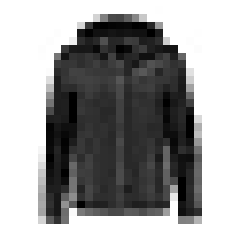

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

Saving figure fashion_mnist_plot


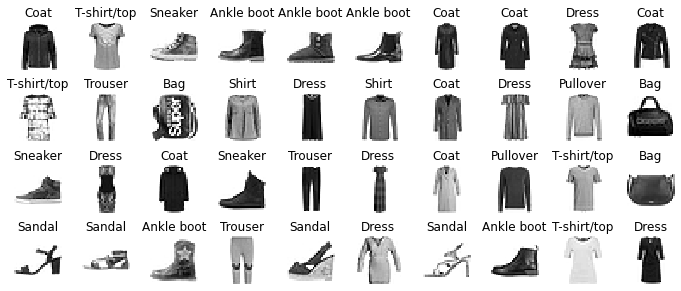

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

Now, let's build the neural network! Here is a classification with two hidden layers:

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

* The Flatten layer converts each input image into a 1D array (it computes X.reshape(-1, 1)). This layer is just there to do simple preprocessing.
* A Dense output layer with 10 neurons(one per class), uses softmax activation function which ensures that all the estimated probabilities are between 0 and 1.

In [16]:
# displays all the model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In output shape: None means the batch size can be anything.<br>
The first hidden layer has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235500.

In [17]:
model.layers

In [19]:
model.get_layer('dense_1')

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights, weights.shape

(array([[ 0.01003801, -0.04325436, -0.04484243, ...,  0.01199073,
          0.01148185,  0.05522171],
        [ 0.01244114,  0.06767683,  0.06142695, ...,  0.01430641,
          0.05937132, -0.02304103],
        [-0.06236849,  0.06793554,  0.02341427, ...,  0.02577329,
         -0.05445239, -0.02746987],
        ...,
        [-0.06234135,  0.0195537 ,  0.01910534, ...,  0.05252483,
         -0.06795444,  0.05522694],
        [-0.07417506, -0.03450098,  0.03074972, ..., -0.00975307,
          0.0610166 ,  0.04502045],
        [ 0.00284652, -0.02774149,  0.02018623, ...,  0.01522365,
          0.02362687,  0.01185147]], dtype=float32),
 (784, 300))

In [23]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7107 - accuracy: 0.7648 - val_loss: 0.5466 - val_accuracy: 0.8052
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4909 - accuracy: 0.8282 - val_loss: 0.4374 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4440 - accuracy: 0.8445 - val_loss: 0.4233 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4155 - accuracy: 0.8539 - val_loss: 0.3963 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3969 - accuracy: 0.8599 - val_loss: 0.3911 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3806 - accuracy: 0.8664 - val_loss: 0.3849 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3665 - accuracy: 0.8708 - val_loss: 0.3624 - val_accuracy:

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [28]:
history.history

{'loss': [0.7107414603233337,
  0.49090835452079773,
  0.44401320815086365,
  0.4154742658138275,
  0.39689818024635315,
  0.3805648386478424,
  0.366514652967453,
  0.3546100854873657,
  0.34498628973960876,
  0.33463746309280396,
  0.3265800178050995,
  0.3185178339481354,
  0.3112618625164032,
  0.30451586842536926,
  0.2982017695903778,
  0.2916739583015442,
  0.28591254353523254,
  0.2810872495174408,
  0.27614620327949524,
  0.2703799307346344,
  0.26532232761383057,
  0.2611219882965088,
  0.25688424706459045,
  0.2514587938785553,
  0.24717961251735687,
  0.24403443932533264,
  0.23909910023212433,
  0.23470968008041382,
  0.23092561960220337,
  0.22752828896045685],
 'accuracy': [0.7648000121116638,
  0.8281999826431274,
  0.8444545269012451,
  0.8538545370101929,
  0.8599091172218323,
  0.8663636445999146,
  0.8707818388938904,
  0.8747272491455078,
  0.8772181868553162,
  0.8798909187316895,
  0.8841090798377991,
  0.8865454792976379,
  0.8890363574028015,
  0.89032727479934

Saving figure keras_learning_curves_plot


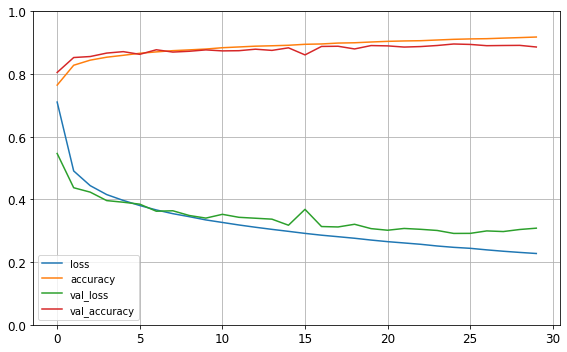

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 57.9604 - accuracy: 0.8462


[57.960357666015625, 0.8461999893188477]

In [31]:
X_new = X_test[:3]

y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_pred = model.predict_classes(X_new)

y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


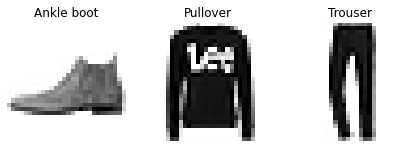

In [35]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### Building a Regression MLP using the Sequential API
Let's load, split and scale the California housing dataset:

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape

(11610, 8)

It is similar to classification example. The main differences are the fact that the output layer has a single neuron and uses no activation function, and the loss function is the mean squared error.

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), #  input_shape = (11610, 8)[1:]
    keras.layers.Dense(1) # single neuron output layer
])

In [39]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [40]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.4230 - val_loss: 0.5546
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4911 - val_loss: 0.4918
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4526 - val_loss: 0.4741
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4374 - val_loss: 0.4587
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4251 - val_loss: 0.4405
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4167 - val_loss: 0.4423
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4097 - val_loss: 0.4369
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.4257
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3995 - val_loss: 0.4265
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3952 - val_loss: 0.4208

In [41]:
X_new = X_test[:3] # sample data as new instances for prediction
y_pred = model.predict(X_new)

y_pred

array([[0.59607327],
       [1.6410043 ],
       [3.7451282 ]], dtype=float32)

### Building Complex models using the Functional API

#### Handling multiple inputs

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_) 
hidden2 = keras.layers.Dense(10, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [43]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.5138 - val_loss: 0.7666
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6643 - val_loss: 0.6318
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6033 - val_loss: 0.6059
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5816 - val_loss: 0.5874
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5641 - val_loss: 0.5719
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5506 - val_loss: 0.5594
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5398 - val_loss: 0.5501
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5308 - val_loss: 0.5428
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5234 - val_loss: 0.5361
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5177 - val_loss: 0.5306

In [44]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 793us/step - loss: 0.5063


In [45]:
y_pred = model.predict(X_new)

y_pred

array([[0.7520311],
       [1.596787 ],
       [2.9141204]], dtype=float32)

Suppose, we want to send five features through the wide path (0 to 4), and six features through the deep path (2 to 7):

In [46]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output]) 

In [47]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), y_val))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5665 - val_loss: 1.1959
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9517 - val_loss: 0.7852
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7212 - val_loss: 0.6726
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6381 - val_loss: 0.6209
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5877
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5641 - val_loss: 0.5672
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5438 - val_loss: 0.5501
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5290 - val_loss: 0.5383
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5185 - val_loss: 0.5311
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5105 - val_loss: 0.5244

In [48]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 833us/step - loss: 0.4872


In [49]:
y_pred = model.predict((X_new_A, X_new_B))

y_pred

array([[0.55146885],
       [1.80619   ],
       [2.9147563 ]], dtype=float32)

#### Handling multiple outputs

In [50]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output]) 

Each output will need its own loss function (if we pass single loss, Keras will assume the same loss for all the outputs).<br>
We care much more about the main output than about the auxilary output (as it is just used for regularization), so we want to give the main output's loss a much greater weight.

In [51]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [52]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_val_A, X_val_B],[y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9276 - output_loss: 0.8249 - aux_output_loss: 1.8514 - val_loss: 0.6587 - val_output_loss: 0.5801 - val_aux_output_loss: 1.3660
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6985 - output_loss: 0.6355 - aux_output_loss: 1.2651 - val_loss: 0.5974 - val_output_loss: 0.5340 - val_aux_output_loss: 1.1677
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5713 - output_loss: 0.5167 - aux_output_loss: 1.0621 - val_loss: 0.5454 - val_output_loss: 0.4944 - val_aux_output_loss: 1.0046
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5097 - output_loss: 0.4641 - aux_output_loss: 0.9202 - val_loss: 0.5145 - val_output_loss: 0.4749 - val_aux_output_loss: 0.8713
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4862 - output_loss: 0.4509 - aux_output_loss: 0.8044 - val_loss: 0.4946 - val_output_loss: 0.4629 - val_aux_

In [53]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3726 - output_loss: 0.3591 - aux_output_loss: 0.4943


In [54]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[0.46530092],
        [1.6191185 ],
        [3.2599525 ]], dtype=float32),
 array([[0.7211354],
        [1.8221537],
        [2.655029 ]], dtype=float32))

### Using the Subclass API to Build Dynamic Models
Both the Sequential and the Functional API are declarative; you declare the layers and how they are connected, and then feed the model some data for training. But it's static. Some model involves loops, varying shapes,conditional branching, and other dynamic behaviour. For such cases, Subclassing API is used.

In [55]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        inputA, inputB = inputs
        hidden1 = self.hidden1(inputB)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([inputA, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(inputA)
        
        return main_output, aux_output
    
model = WideAndDeepModel()

In [56]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [57]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_val_A, X_val_B],[y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0332 - output_1_loss: 0.7923 - output_2_loss: 3.2018 - val_loss: 0.6765 - val_output_1_loss: 0.5512 - val_output_2_loss: 1.8043
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5921 - output_1_loss: 0.5190 - output_2_loss: 1.2501 - val_loss: 0.5672 - val_output_1_loss: 0.5265 - val_output_2_loss: 0.9334
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5116 - output_1_loss: 0.4794 - output_2_loss: 0.8016 - val_loss: 0.5667 - val_output_1_loss: 0.5479 - val_output_2_loss: 0.7362
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4895 - output_1_loss: 0.4670 - output_2_loss: 0.6923 - val_loss: 0.4934 - val_output_1_loss: 0.4716 - val_output_2_loss: 0.6894
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4750 - output_1_loss: 0.4543 - output_2_loss: 0.6620 - val_loss: 0.4815 - val_output_1_loss: 0.4599 - val_ou

In [60]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

y_pred_main, y_pred_aux 

162/162 [==============================] - 0s 1ms/step - loss: 0.3979 - output_1_loss: 0.3732 - output_2_loss: 0.6206


(array([[0.3249455],
        [1.5949948],
        [3.3147027]], dtype=float32),
 array([[1.0403594],
        [1.5478688],
        [2.5467997]], dtype=float32))

### Saving and Restoring a Model
Saving a trained model can be done for Sequential and Functional API. Keras will use HDF5 format to save both the model architecture and the values of all the model parameters for every layer.

In [65]:
model = WideAndDeepModel(30, activation="relu")

np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [67]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4842


In [68]:
model.save("my_keras_model.h5")

In [69]:
model = keras.models.load_model("my_keras_model.h5")

In [70]:
model.predict(X_new)

array([[0.70360875],
       [1.577575  ],
       [2.8617046 ]], dtype=float32)

In [71]:
model.save_weights("my_keras_weights.ckpt")

In [72]:
model.load_weights("my_keras_weights.ckpt")

Training may last for several hours, especially when training on large datasets. In this case, you should not only save your model at the end of the training, but also save checkpoints at regular intervals. 

This can be done using *Callbacks*.

### Using Callbacks during Training

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [92]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True) # save_best_only when using validation checkpoint
history = model.fit(X_train, y_train, epochs=20, callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.8688
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7040
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6180
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5762
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5496
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5267
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5100
Epoch 8/20
363/363 [==============================] - 0s 959us/step - loss: 0.4960
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4856
Epoch 10/20
363/363 [==============================] - 0s 950us/step - loss: 0.4771
Epoch 11/20
363/363 [==============================] - 0s 931us/step - loss: 0.4698
Epoch 12/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4642
Epoch 13/20
363/363

In [93]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 887us/step - loss: 0.3691


#### Early Stopping
Use EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs(defined by the patience argument).

In [94]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3528 - val_loss: 0.3870
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3527 - val_loss: 0.3765
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.3779
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3496 - val_loss: 0.3791
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3755
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3768
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3479 - val_loss: 0.3759
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3471 - val_loss: 0.3757
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3465 - val_loss: 0.3747
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3465 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3253 - val_loss: 0.3513
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3338 - val_loss: 0.3584
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3210 - val_loss: 0.3513
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3265 - val_loss: 0.3530
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3188 - val_loss: 0.3549
Epoch 86/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3251 - val_loss: 0.3518
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3166 - val_loss: 0.3478
Epoch 88/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3159 - val_loss: 0.3594
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3225 - val_loss: 0.3514
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3190 - val_loss: 

In [95]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 926us/step - loss: 0.3332


#### Writing own custom callbacks
The following callback will display the ratio between the validation loss and the training loss during the model training.

In [96]:
class PrintValTrainRatioCB(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\n val/train: {:2f}'.format(logs['val_loss']/logs['loss']))

In [97]:
val_train_ratio_cb = PrintValTrainRatioCB()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val), callbacks=[val_train_ratio_cb])

325/363 [=========================>....] - ETA: 0s - loss: 0.3174
 val/train: 1.130085
363/363 [==============================] - 0s 1ms/step - loss: 0.3167 - val_loss: 0.3579


## Using Tensorboard for Visualization

In [105]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_08_17-09_48_05'

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [108]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4771 - val_loss: 0.4883

## Hyperparameter Tuning
One simple way is to try many combinations of hyperparameters and see which one workds best on the validation set (K-fold cross validation).

In [109]:
# sequential model for univariate regression
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [110]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [114]:
keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=(X_val, y_val), 
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2787 - val_loss: 0.8670
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7448 - val_loss: 0.6481
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6078 - val_loss: 0.5705
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 0.5489
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5078 - val_loss: 0.5313
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4924 - val_loss: 0.5150
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4818 - val_loss: 0.5047
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4718 - val_loss: 0.4930
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4642 - val_loss: 0.4849
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4581 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3533 - val_loss: 0.3962
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3546 - val_loss: 0.3975
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 0.3945
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3533 - val_loss: 0.3936
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3512 - val_loss: 0.4058
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3518 - val_loss: 0.3923
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3504 - val_loss: 0.3933
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3508 - val_loss: 0.3921
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3500 - val_loss: 0.3923
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3512 - val_loss: 

In [117]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3583


In [118]:
y_pred = keras_reg.predict(X_new)

y_pred

array([0.4993362, 1.5726289, 3.6899676], dtype=float32)

In [119]:
np.random.seed(42)
tf.random.set_seed(42)

Since there are many hyperparameters, it is preferable to use randomized search rather than grid search.

Warning: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon.

In [124]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36 ...
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 2ms/step - loss: 5.4828 - val_loss: 4.0233
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.1198 - val_loss: 2.3990
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.9709 - val_loss: 1.6071
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3932 - val_loss: 1.2067
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0950 - val_loss: 0.9991
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9362 - val_loss: 0.8882
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8482 - val_loss: 0.8252
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7964 - val_loss: 0.7871
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7637 - val_loss: 0.7618
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7411 - val_loss: 0.7433
E

242/242 [==============================] - 0s 1ms/step - loss: 0.5228 - val_loss: 0.5397
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5225 - val_loss: 0.5394
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5224 - val_loss: 0.5393
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5222 - val_loss: 0.5392
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5220 - val_loss: 0.5391
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5218 - val_loss: 0.5389
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5216 - val_loss: 0.5388
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5215 - val_loss: 0.5387
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5213 - val_loss: 0.5386
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5212 - val_loss: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s remaining:    0.0s


242/242 [==============================] - 0s 2ms/step - loss: 6.1853 - val_loss: 4.2448
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.4649 - val_loss: 2.6087
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.1763 - val_loss: 1.7684
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5207 - val_loss: 1.3187
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1717 - val_loss: 1.0704
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9781 - val_loss: 0.9298
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8664 - val_loss: 0.8463
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7985 - val_loss: 0.7940
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7549 - val_loss: 0.7597
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7253 - val_loss: 0.7357
E

242/242 [==============================] - 0s 1ms/step - loss: 0.5076 - val_loss: 0.5406
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5074 - val_loss: 0.5404
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5073 - val_loss: 0.5401
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 0.5400
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5070 - val_loss: 0.5399
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5069 - val_loss: 0.5401
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5068 - val_loss: 0.5401
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5067 - val_loss: 0.5400
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5066 - val_loss: 0.5397
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5064 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5394 - val_loss: 0.5479
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5386 - val_loss: 0.5472
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5377 - val_loss: 0.5466
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5369 - val_loss: 0.5461
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5362 - val_loss: 0.5455
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5355 - val_loss: 0.5448
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5349 - val_loss: 0.5441
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5343 - val_loss: 0.5437
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5337 - val_loss: 0.5433
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5331 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 1.5774 - val_loss: 1.5782
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5100 - val_loss: 1.5248
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4672 - val_loss: 1.4887
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4369 - val_loss: 1.4627
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4147 - val_loss: 1.4435
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3978 - val_loss: 1.4289
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3846 - val_loss: 1.4173
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3742 - val_loss: 1.4083
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3658 - val_loss: 1.4008
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3590 - val_loss: 1.39

242/242 [==============================] - 0s 1ms/step - loss: 1.3142 - val_loss: 1.3545
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3142 - val_loss: 1.3545
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3141 - val_loss: 1.3545
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3141 - val_loss: 1.3544
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3141 - val_loss: 1.3544
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3140 - val_loss: 1.3544
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3140 - val_loss: 1.3543
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3140 - val_loss: 1.3543
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3140 - val_loss: 1.3543
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3139 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.8320 - val_loss: 0.8453
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8234 - val_loss: 0.8368
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8148 - val_loss: 0.8284
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8062 - val_loss: 0.8201
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7978 - val_loss: 0.8119
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7896 - val_loss: 0.8041
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7813 - val_loss: 0.7961
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7732 - val_loss: 0.7885
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7652 - val_loss: 0.7809
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7570 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4319 - val_loss: 0.4490
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4311 - val_loss: 0.4506
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4306 - val_loss: 0.4477
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4297 - val_loss: 0.4504
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4290 - val_loss: 0.4473
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.4493
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4282 - val_loss: 0.4461
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4270 - val_loss: 0.4458
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4271 - val_loss: 0.4440
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4262 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4624 - val_loss: 0.5048
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4596 - val_loss: 0.5022
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4575 - val_loss: 0.4995
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4548 - val_loss: 0.4970
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4530 - val_loss: 0.4955
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4509 - val_loss: 0.4940
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4493 - val_loss: 0.4923
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss: 0.4917
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4462 - val_loss: 0.4896
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4444 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4018 - val_loss: 0.4425
Epoch 100/100
121/121 [==============================] - 0s 795us/step - loss: 0.4411
[CV]  learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4, total=  33.5s
[CV] learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4 .....
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 2.9686 - val_loss: 1.0700
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8701 - val_loss: 0.7758
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7379 - val_loss: 0.7343
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7017 - val_loss: 0.7156
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6785 - val_loss: 0.6978
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6604 - val_loss: 0.6837
Epoch 7/100
242/242 [==============================] - 0s 1ms/step 

242/242 [==============================] - 0s 1ms/step - loss: 0.4317 - val_loss: 0.4608
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4306 - val_loss: 0.4664
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4294 - val_loss: 0.4704
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4295 - val_loss: 0.4601
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.4582
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4278 - val_loss: 0.4611
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4268 - val_loss: 0.4564
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.4594
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4256 - val_loss: 0.4582
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4252 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4153 - val_loss: 0.4536
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4147 - val_loss: 0.4530
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4141 - val_loss: 0.4520
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.4514
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4128 - val_loss: 0.4504
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4124 - val_loss: 0.4491
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4115 - val_loss: 0.4473
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4111 - val_loss: 0.4484
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4104 - val_loss: 0.4455
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4100 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4438 - val_loss: 0.4849
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4423 - val_loss: 0.4824
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4406 - val_loss: 0.4809
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4390 - val_loss: 0.4800
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4374 - val_loss: 0.4788
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4360 - val_loss: 0.4771
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4346 - val_loss: 0.4752
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.4746
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4318 - val_loss: 0.4733
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4307 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.6219 - val_loss: 0.6191
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6086 - val_loss: 0.6076
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5969 - val_loss: 0.5975
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5868 - val_loss: 0.5883
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5776 - val_loss: 0.5797
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5693 - val_loss: 0.5726
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5621 - val_loss: 0.5647
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5550 - val_loss: 0.5587
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5491 - val_loss: 0.5528
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5436 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4455 - val_loss: 0.4583
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4448 - val_loss: 0.4581
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4441 - val_loss: 0.4573
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4435 - val_loss: 0.4569
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 0.4564
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4420 - val_loss: 0.4564
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4416 - val_loss: 0.4555
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4545
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4404 - val_loss: 0.4538
Epoch 100/100
121/121 [==============================] - 0s 799us/step - loss: 0.4263
[CV]  lea

242/242 [==============================] - 0s 1ms/step - loss: 0.3227 - val_loss: 0.3883
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3190 - val_loss: 0.3642
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3165 - val_loss: 0.3609
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3176 - val_loss: 0.3964
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3295 - val_loss: 0.3697
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3157 - val_loss: 0.3710
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3189 - val_loss: 0.3691
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3173 - val_loss: 0.3618
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3351 - val_loss: 0.3738
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3181 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3273 - val_loss: 0.3758
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3354 - val_loss: 0.3750
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3240 - val_loss: 0.3945
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3348 - val_loss: 0.3728
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3265 - val_loss: 0.8750
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3527 - val_loss: 0.3744
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3205 - val_loss: 0.3706
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3208 - val_loss: 0.3740
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3304 - val_loss: 0.3754
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3209 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3474 - val_loss: 0.3851
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3439 - val_loss: 0.3842
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3449 - val_loss: 0.4091
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3435 - val_loss: 0.3951
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3736 - val_loss: 0.3771
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3371 - val_loss: 0.3816
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3382 - val_loss: 0.3836
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3402 - val_loss: 0.3743
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3507 - val_loss: 0.3714
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3196 - val_loss: 0.3648
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3212 - val_loss: 0.3631
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3165 - val_loss: 0.3632
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3219 - val_loss: 0.5252
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3191 - val_loss: 0.3726
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3163 - val_loss: 0.3592
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3136 - val_loss: 0.3653
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3125 - val_loss: 0.3588
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3092 - val_loss: 0.3595
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3117 - val_loss: 

Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2746 - val_loss: 0.3415
Epoch 35/100
121/121 [==============================] - 0s 826us/step - loss: 0.3235
[CV]  learning_rate=0.02093484379537809, n_hidden=3, n_neurons=78, total=  13.7s
[CV] learning_rate=0.02093484379537809, n_hidden=3, n_neurons=78 .....
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7091 - val_loss: 0.4889
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4295 - val_loss: 0.4514
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4052 - val_loss: 0.4388
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3900 - val_loss: 0.4230
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3754 - val_loss: 0.4036
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3692 - val_loss: 0.4139
Epoch 7/100
242/242 [==============================] - 

242/242 [==============================] - 0s 2ms/step - loss: 6.6393 - val_loss: 4.7885
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.4292 - val_loss: 2.6448
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.0385 - val_loss: 1.6901
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3863 - val_loss: 1.2289
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0614 - val_loss: 0.9935
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8913 - val_loss: 0.8670
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7976 - val_loss: 0.7939
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7426 - val_loss: 0.7484
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7078 - val_loss: 0.7176
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6841 - val_loss: 0.6952
E

242/242 [==============================] - 0s 1ms/step - loss: 0.5198 - val_loss: 0.5356
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5197 - val_loss: 0.5355
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5197 - val_loss: 0.5355
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5196 - val_loss: 0.5356
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5195 - val_loss: 0.5355
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5194 - val_loss: 0.5354
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5194 - val_loss: 0.5354
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5194 - val_loss: 0.5354
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5193 - val_loss: 0.5354
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5192 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5217 - val_loss: 0.5674
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5211 - val_loss: 0.5666
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5205 - val_loss: 0.5660
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5198 - val_loss: 0.5637
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5194 - val_loss: 0.5632
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5189 - val_loss: 0.5628
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5183 - val_loss: 0.5616
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5179 - val_loss: 0.5609
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5174 - val_loss: 0.5607
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5170 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5774 - val_loss: 0.5945
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5747 - val_loss: 0.5917
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5722 - val_loss: 0.5896
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5697 - val_loss: 0.5873
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5675 - val_loss: 0.5847
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5653 - val_loss: 0.5826
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5633 - val_loss: 0.5810
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5613 - val_loss: 0.5786
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5596 - val_loss: 0.5771
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.4658 - val_loss: 0.4836
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4601 - val_loss: 0.4791
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4547 - val_loss: 0.4786
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4503 - val_loss: 0.4699
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4456 - val_loss: 0.4664
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4411 - val_loss: 0.4630
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4377 - val_loss: 0.4599
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4336 - val_loss: 0.4595
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4311 - val_loss: 0.4539
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4272 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3270 - val_loss: 0.3700
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3276 - val_loss: 0.3704
Epoch 99/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3259 - val_loss: 0.3693
Epoch 100/100
121/121 [==============================] - 0s 844us/step - loss: 0.3419
[CV]  learning_rate=0.001342090852386379, n_hidden=3, n_neurons=82, total=  39.3s
[CV] learning_rate=0.001342090852386379, n_hidden=3, n_neurons=82 ....
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 2.3776 - val_loss: 1.0252
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8009 - val_loss: 0.6991
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6464 - val_loss: 0.6430
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5978 - val_loss: 0.6085
Epoch 5/100
242/242 [==============================] - 0s 2ms/st

242/242 [==============================] - 0s 2ms/step - loss: 0.3263 - val_loss: 0.3719
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3257 - val_loss: 0.3699
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3244 - val_loss: 0.3709
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3228 - val_loss: 0.3700
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3226 - val_loss: 0.3684
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3253 - val_loss: 0.3690
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3208 - val_loss: 0.3679
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3212 - val_loss: 0.3681
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3187 - val_loss: 0.3674
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3181 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3570 - val_loss: 0.3871
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3561 - val_loss: 0.3869
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3549 - val_loss: 0.3865
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3539 - val_loss: 0.3851
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3519 - val_loss: 0.3878
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3517 - val_loss: 0.3831
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3503 - val_loss: 0.3825
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3491 - val_loss: 0.3808
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3479 - val_loss: 0.3801
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3463 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3630 - val_loss: 0.4015
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3612 - val_loss: 0.4002
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3596 - val_loss: 0.3967
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3565 - val_loss: 0.3963
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3539 - val_loss: 0.3961
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3533 - val_loss: 0.3968
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3511 - val_loss: 0.3929
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3921
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3477 - val_loss: 0.3905
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3451 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4044 - val_loss: 0.4286
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3965 - val_loss: 0.4192
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3897 - val_loss: 0.4145
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3848 - val_loss: 0.4107
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.4100
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3752 - val_loss: 0.4069
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3723 - val_loss: 0.4011
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3680 - val_loss: 0.3980
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3653 - val_loss: 0.4000
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3607 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.2906 - val_loss: 0.3490
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2897 - val_loss: 0.3407
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2892 - val_loss: 0.3414
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2903 - val_loss: 0.3533
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2880 - val_loss: 0.3427
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2892 - val_loss: 0.3408
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2887 - val_loss: 0.3419
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2881 - val_loss: 0.3441
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2873 - val_loss: 0.3393
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2876 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3118 - val_loss: 0.3522
Epoch 68/100
121/121 [==============================] - 0s 792us/step - loss: 0.3252
[CV]  learning_rate=0.003601683277857631, n_hidden=3, n_neurons=26, total=  24.1s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 14.3min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f9ce9d8ef10>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.save("final_model.h5")

In [ ]:
model = keras.models.load_model("final_model.h5")
model.predict(X_new)